# Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

# 1. Read and understand the data

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [2]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#set display-related options 
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 80)

In [3]:
#load the dataset 
country_df = pd.read_csv('../input/country/Country-data (1).csv')
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#check the shape of dataframe
country_df.shape

(167, 10)

In [5]:
#inspect the dataframe
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Inference - 

#### 1. As seen from above , there are no null values in any columns since non-null count for all columns is 167 .

#### 2. Also none of the coumns have incorrect datatype . Hence no conversion required.

In [6]:
#validate null values if present in any columns 
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
# Duplicate check

country_df.loc[country_df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


# 2. Univariate Analysis and Bi-variate Analysis -


 - ### <u> Child Mortality rate

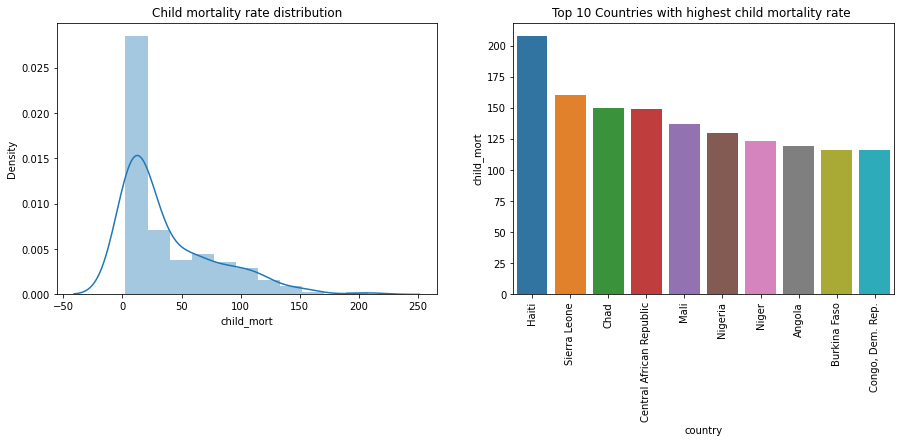

In [8]:
#Child mortality rate
plt.figure(figsize=(15,5))

#plot child mortality rate distribution
plt.subplot(1,2,1)
sns.distplot(country_df['child_mort'])
plt.title("Child mortality rate distribution")


#plot Top 10 countries with highest child mortality rate
plt.subplot(1,2,2)
df_child_mort=country_df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
sns.barplot(x='country',y='child_mort',data=df_child_mort)
plt.xticks(rotation=90)
plt.title("Top 10 Countries with highest child mortality rate ")
plt.show()

### Inference - 

#### 1. Child mortalility rate distribution is left-skewed.

#### 2. Top 10 countries with highest child mortality rate -

####     Haiti, Sierra Leone, Chad ,Central African Republic,Mali,Nigeria,Niger,Angola,Burkina Faso,Congo, Dem. Rep.

 - ### <u> Exports of goods and services per capita


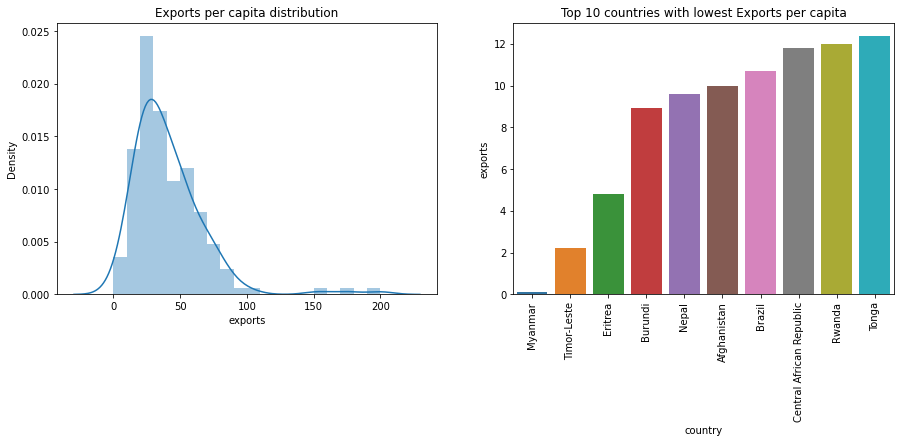

In [9]:
#Exports per capita
plt.figure(figsize=(15,5))

#plot Exports per capita distribution
plt.subplot(1,2,1)
sns.distplot(country_df['exports'])
plt.title("Exports per capita distribution")


#plot Top 10 countries with lowest Exports per capita
plt.subplot(1,2,2)
df_exports=country_df[['country','exports']].sort_values('exports', ascending = True).head(10)
sns.barplot(x='country',y='exports',data=df_exports)
plt.xticks(rotation=90)
plt.title("Top 10 countries with lowest Exports per capita")
plt.show()

### Inference - 

#### 1. Exports per capita distribution is left-skewed.

#### 2. Top 10 countries with lowest Exports per capita-

#### Myanmar,Timor-Leste,Eritrea,Burundi,Nepal,Afghanistan,Brazil,Central African Republic,Rwanda,Tonga

 - ### <u> Total health spending per capita


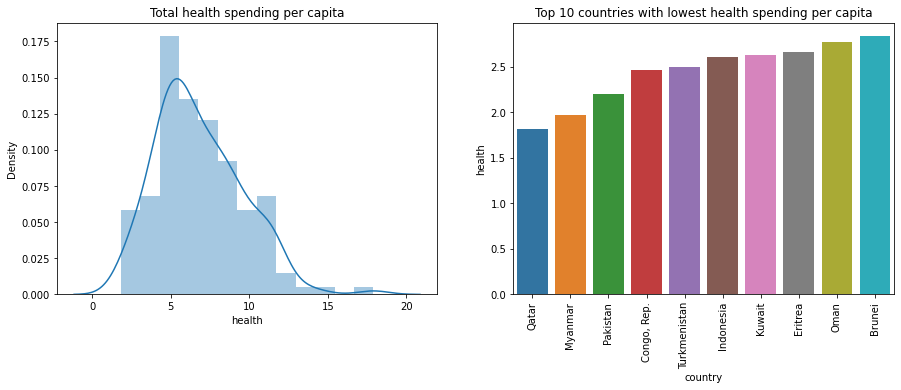

In [10]:
#Total health spending per capita
plt.figure(figsize=(15,5))

#plot health spending per capita distribution
plt.subplot(1,2,1)
sns.distplot(country_df['health'])
plt.title("Total health spending per capita")


#plot Top 10 countries with lowest health spending per capita
plt.subplot(1,2,2)
df_health=country_df[['country','health']].sort_values('health', ascending = True).head(10)
sns.barplot(x='country',y='health',data=df_health)
plt.xticks(rotation=90)
plt.title("Top 10 countries with lowest health spending per capita")
plt.show()

### Inference - 

#### 1. Health spending per capita distribution is left-skewed.

#### 2. Top 10 countries with lowest health spending per capita -

#### Qatar , Myanmar, Pakistan , Congo, Rep.Turkmenistan,Indonesia,Kuwait,Eritrea,Oman,Brunei

- ### <u> Imports of goods and services per capita


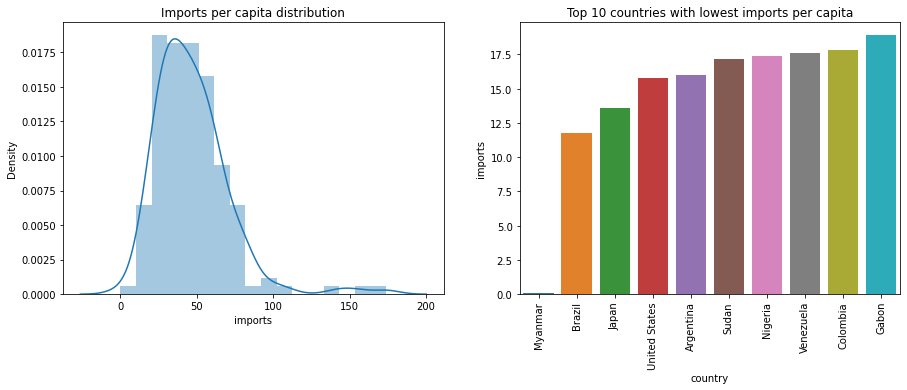

In [11]:
#Imports per capita
plt.figure(figsize=(15,5))

#plot Imports per capita distribution
plt.subplot(1,2,1)
sns.distplot(country_df['imports'])
plt.title("Imports per capita distribution")


#plot Top 10 countries with lowest Imports per capita
plt.subplot(1,2,2)
df_imports=country_df[['country','imports']].sort_values('imports', ascending = True).head(10)
sns.barplot(x='country',y='imports',data=df_imports)
plt.xticks(rotation=90)
plt.title("Top 10 countries with lowest imports per capita")
plt.show()

### Inference - 

#### 1. Imports per capita distribution is left-skewed.

#### 2. Top 10 countries with lowest Imports per capita-

#### Myanmar,Brazil,Japan,United States,Argentina,Sudan,Nigeria,Venezuela,Colombia,Gabon.

 - ### <u> Net Income per person

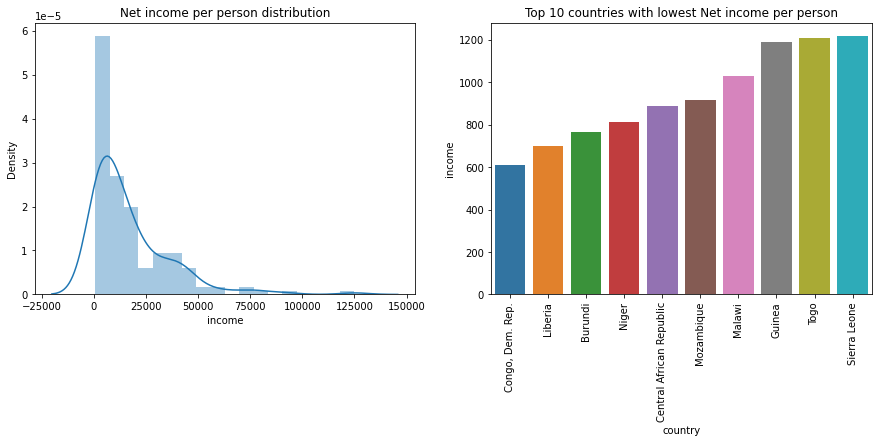

In [12]:
#Net income per person
plt.figure(figsize=(15,5))

#plot Net income per person distribution
plt.subplot(1,2,1)
sns.distplot(country_df['income'])
plt.title("Net income per person distribution")


#plot Top 10 countries with lowest Net income per person
plt.subplot(1,2,2)
df_income=country_df[['country','income']].sort_values('income', ascending = True).head(10)
sns.barplot(x='country',y='income',data=df_income)
plt.xticks(rotation=90)
plt.title("Top 10 countries with lowest Net income per person")
plt.show()

### Inference - 

#### 1. Net income per person distribution is left-skewed.

#### 2. Top 10 countries with lowest Net income per person-

#### Congo, Dem. Rep ,Liberia,Burundi,Niger,Central African Republic,Mozambique,Malawi,Guinea,Togo,Sierra Leone

 - ### <u> Inflation

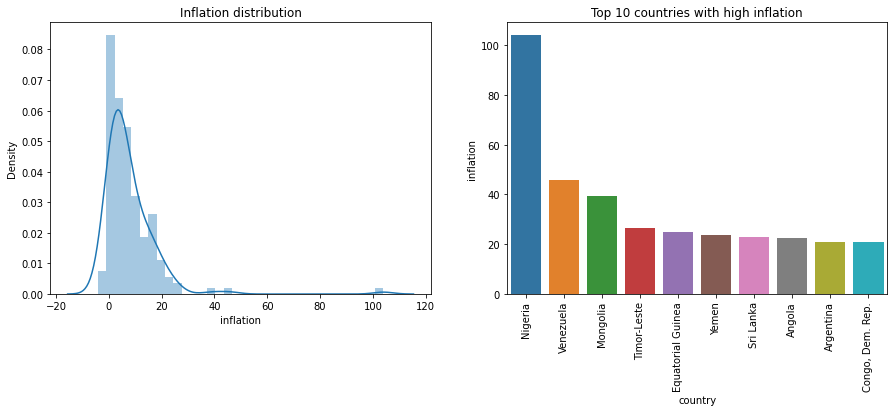

In [13]:
#Inflation
plt.figure(figsize=(15,5))

#plot Inflation distribution
plt.subplot(1,2,1)
sns.distplot(country_df['inflation'])
plt.title("Inflation distribution")


#plot Top 10 countries with high inflation
plt.subplot(1,2,2)
df_inflation=country_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
sns.barplot(x='country',y='inflation',data=df_inflation)
plt.xticks(rotation=90)
plt.title("Top 10 countries with high inflation")
plt.show()

### Inference - 

#### 1. Inflation distribution is left-skewed.

#### 2. Top 10 countries with high inflation -

#### Nigeria,Venezuela,Mongolia,Timor-Leste, Equatorial Guinea, Yemen, Sri Lanka, Angola, Argentina,Congo, Dem. Rep.

 - ### <u> Life expectency

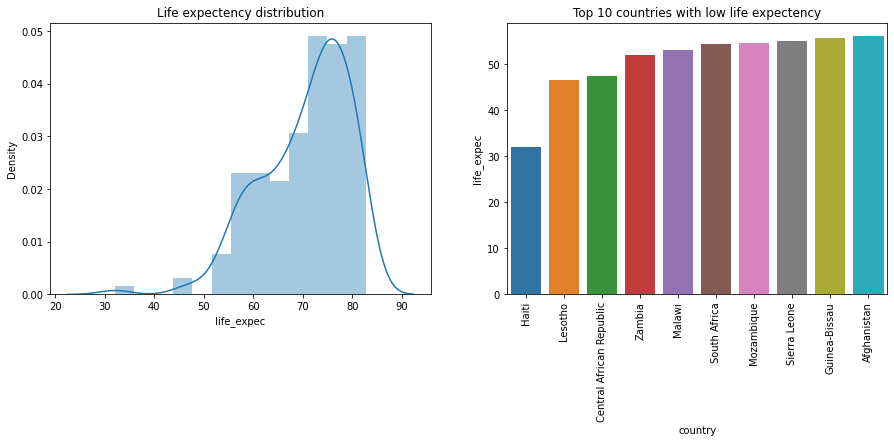

In [14]:
#Life expectency
plt.figure(figsize=(15,5))

#plot Life expectency distribution
plt.subplot(1,2,1)
sns.distplot(country_df['life_expec'])
plt.title("Life expectency distribution")


#plot Top 10 countries with low life expentency
plt.subplot(1,2,2)
df_life_expec=country_df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
sns.barplot(x='country',y='life_expec',data=df_life_expec)
plt.xticks(rotation=90)
plt.title("Top 10 countries with low life expectency")
plt.show()

### Inference - 

#### 1. Life expectency distribution is right-skewed.

#### 2. Top 10 countries with  low life expectency -

#### Haiti,Lesotho,Central African Republic,Zambia,Malawi,South Africa,Mozambique,Sierra Leone,Guinea-Bissau,Afghanistan

 - ### <u> Fertility rate

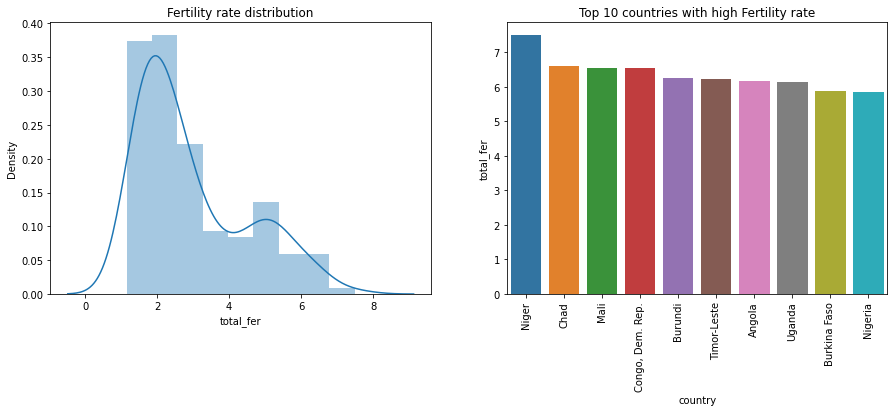

In [15]:
#Fertility rate
plt.figure(figsize=(15,5))

#plot Fertility rate distribution
plt.subplot(1,2,1)
sns.distplot(country_df['total_fer'])
plt.title("Fertility rate distribution")


#plot Top 10 countries with high Fertility rate
plt.subplot(1,2,2)
df_total_fer=country_df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
sns.barplot(x='country',y='total_fer',data=df_total_fer)
plt.xticks(rotation=90)
plt.title("Top 10 countries with high Fertility rate")
plt.show()

### Inference - 

#### 1. Fertility rate distribution is left-skewed.

#### 2. Top 10 countries with high Fertility rate -

#### Niger,Chad,Mali,Congo, Dem. Rep.,Burundi,Timor-Leste,Angola,Uganda,Burkina Faso,Nigeria

 - ### <u> GDP per capita

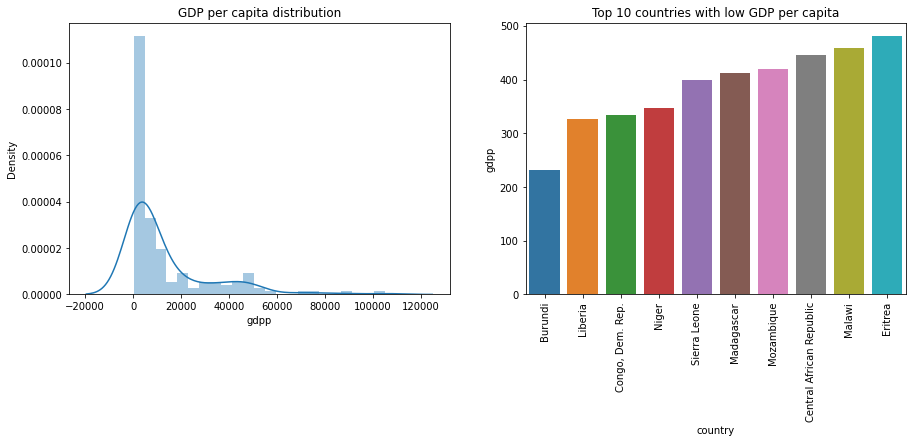

In [16]:
#GDP per capita
plt.figure(figsize=(15,5))

#plot GDP per capita distribution
plt.subplot(1,2,1)
sns.distplot(country_df['gdpp'])
plt.title("GDP per capita distribution")


#plot Top 10 countries with low GDP per capita
plt.subplot(1,2,2)
df_gdpp=country_df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
sns.barplot(x='country',y='gdpp',data=df_gdpp)
plt.xticks(rotation=90)
plt.title("Top 10 countries with low GDP per capita")
plt.show()

### Inference - 

#### 1. GDP per capita distribution is left-skewed.

#### 2. Top 10 countries with low GDP per capita -

#### Burundi,Liberia,Congo, Dem. Rep.,Niger,Sierra Leone,Madagascar,Mozambique,Central African Republic,Malawi,Eritrea

 - ### <u> Correlation between variables

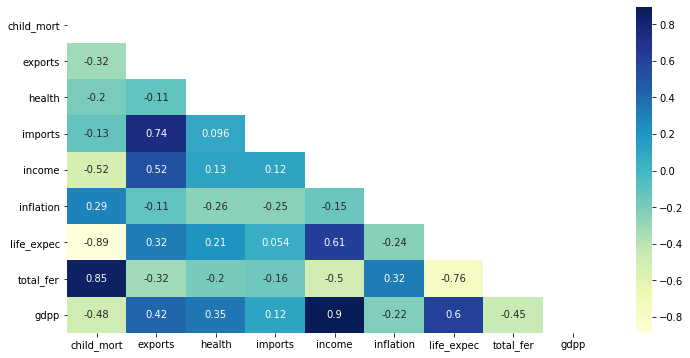

In [17]:
#check correlation between variables
plt.figure(figsize = (12,6))
mask = np.zeros_like(country_df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(country_df.corr(), mask=mask,annot = True, cmap="YlGnBu")
plt.show()

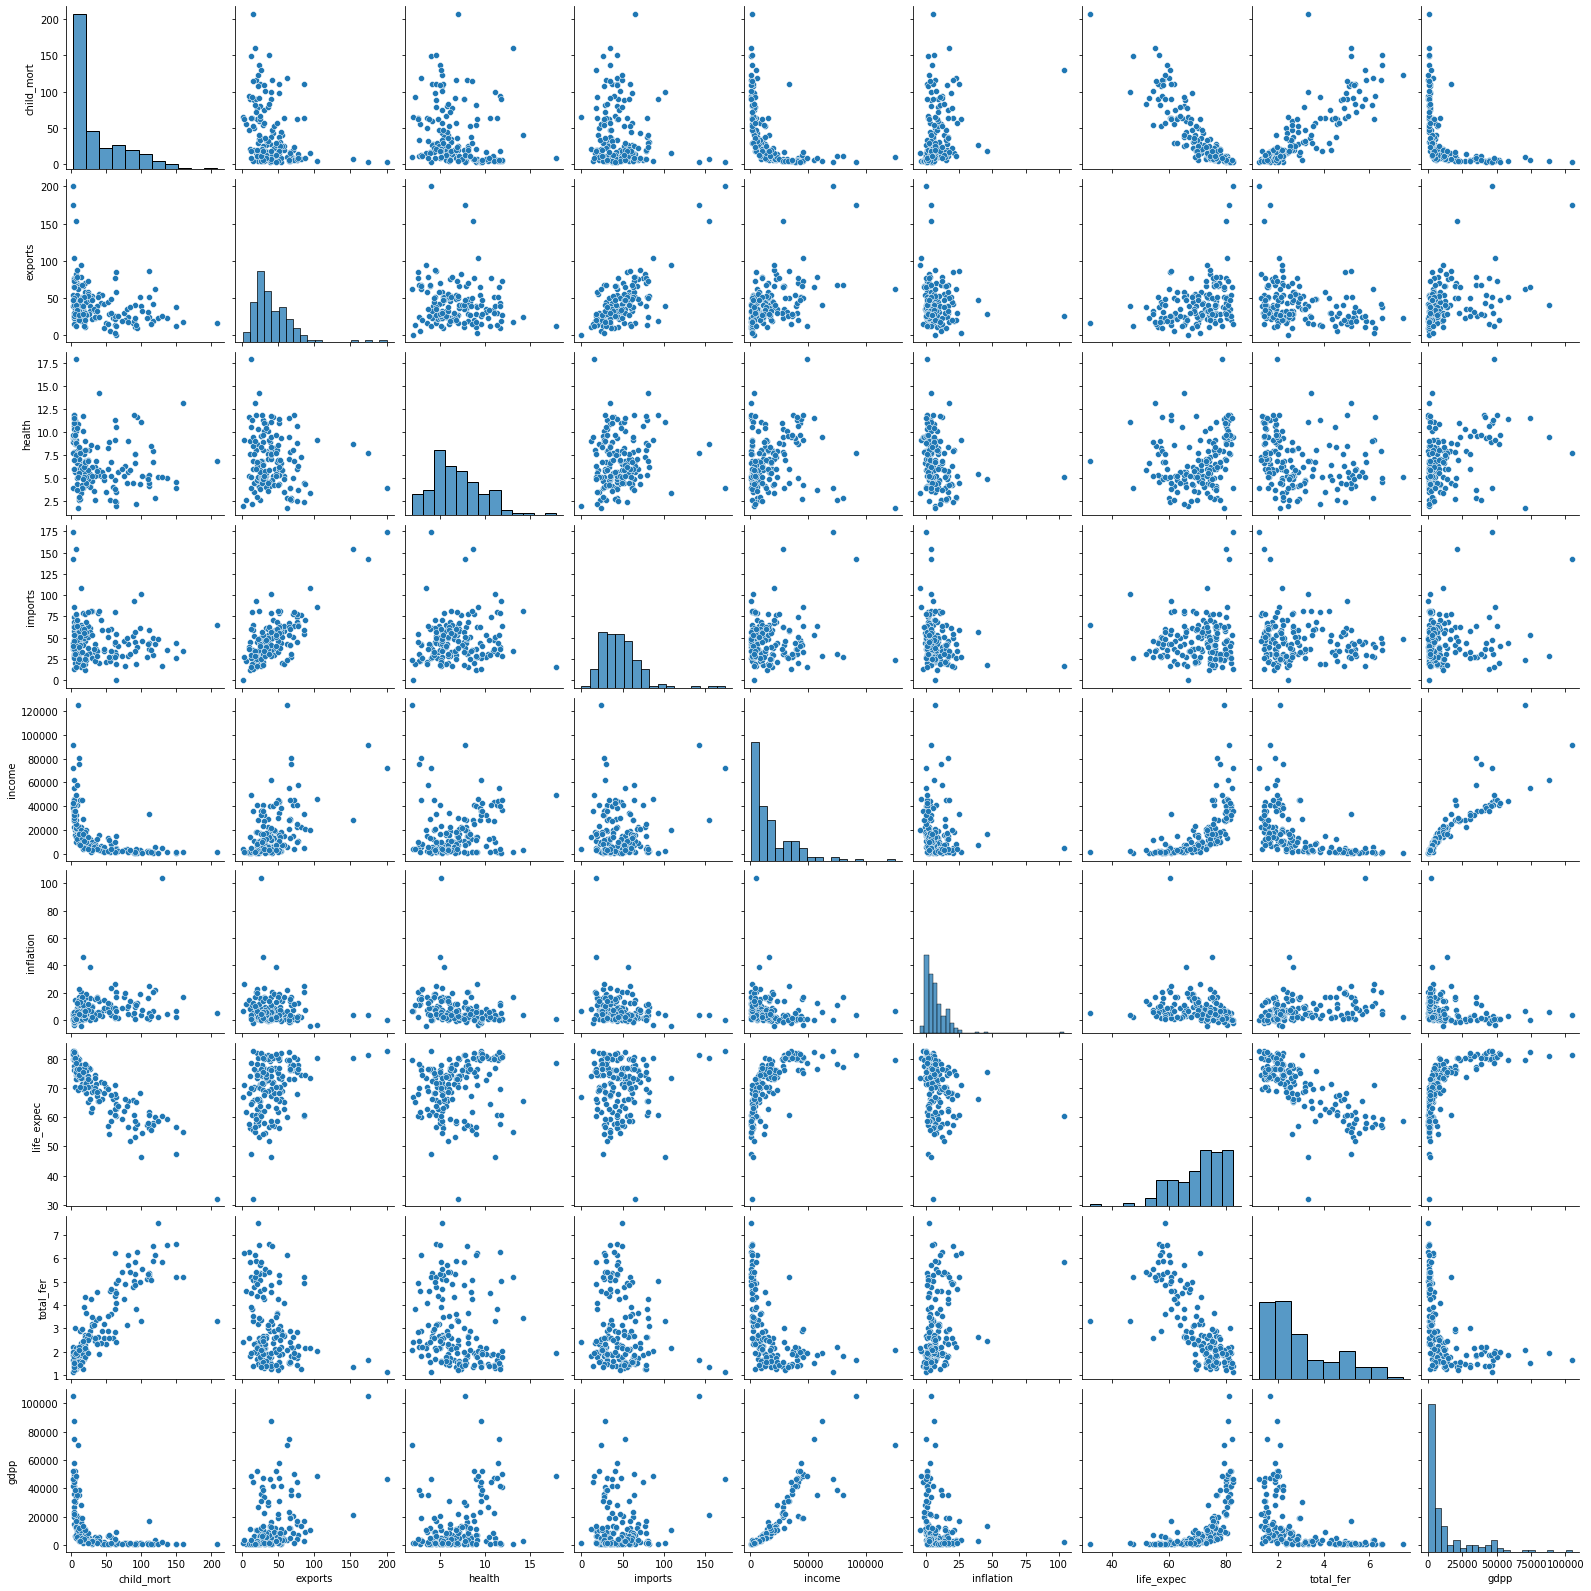

In [18]:
#pairplot of all numeric columns
sns.pairplot(country_df)
plt.show()

### Analysis - 

#### As seen from above heatmap and pairplot, there is high correlation between following variables:
1. income and gdpp

2. life_expec and gdpp

3. imports and exports

4. life_expec and gdpp

5. life_expec and total_fer

6. life_expec and child_mort

# 3. Data Preparation

 - ### <u> Outlier Analysis

In [19]:
#check statistical details of dataframe
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


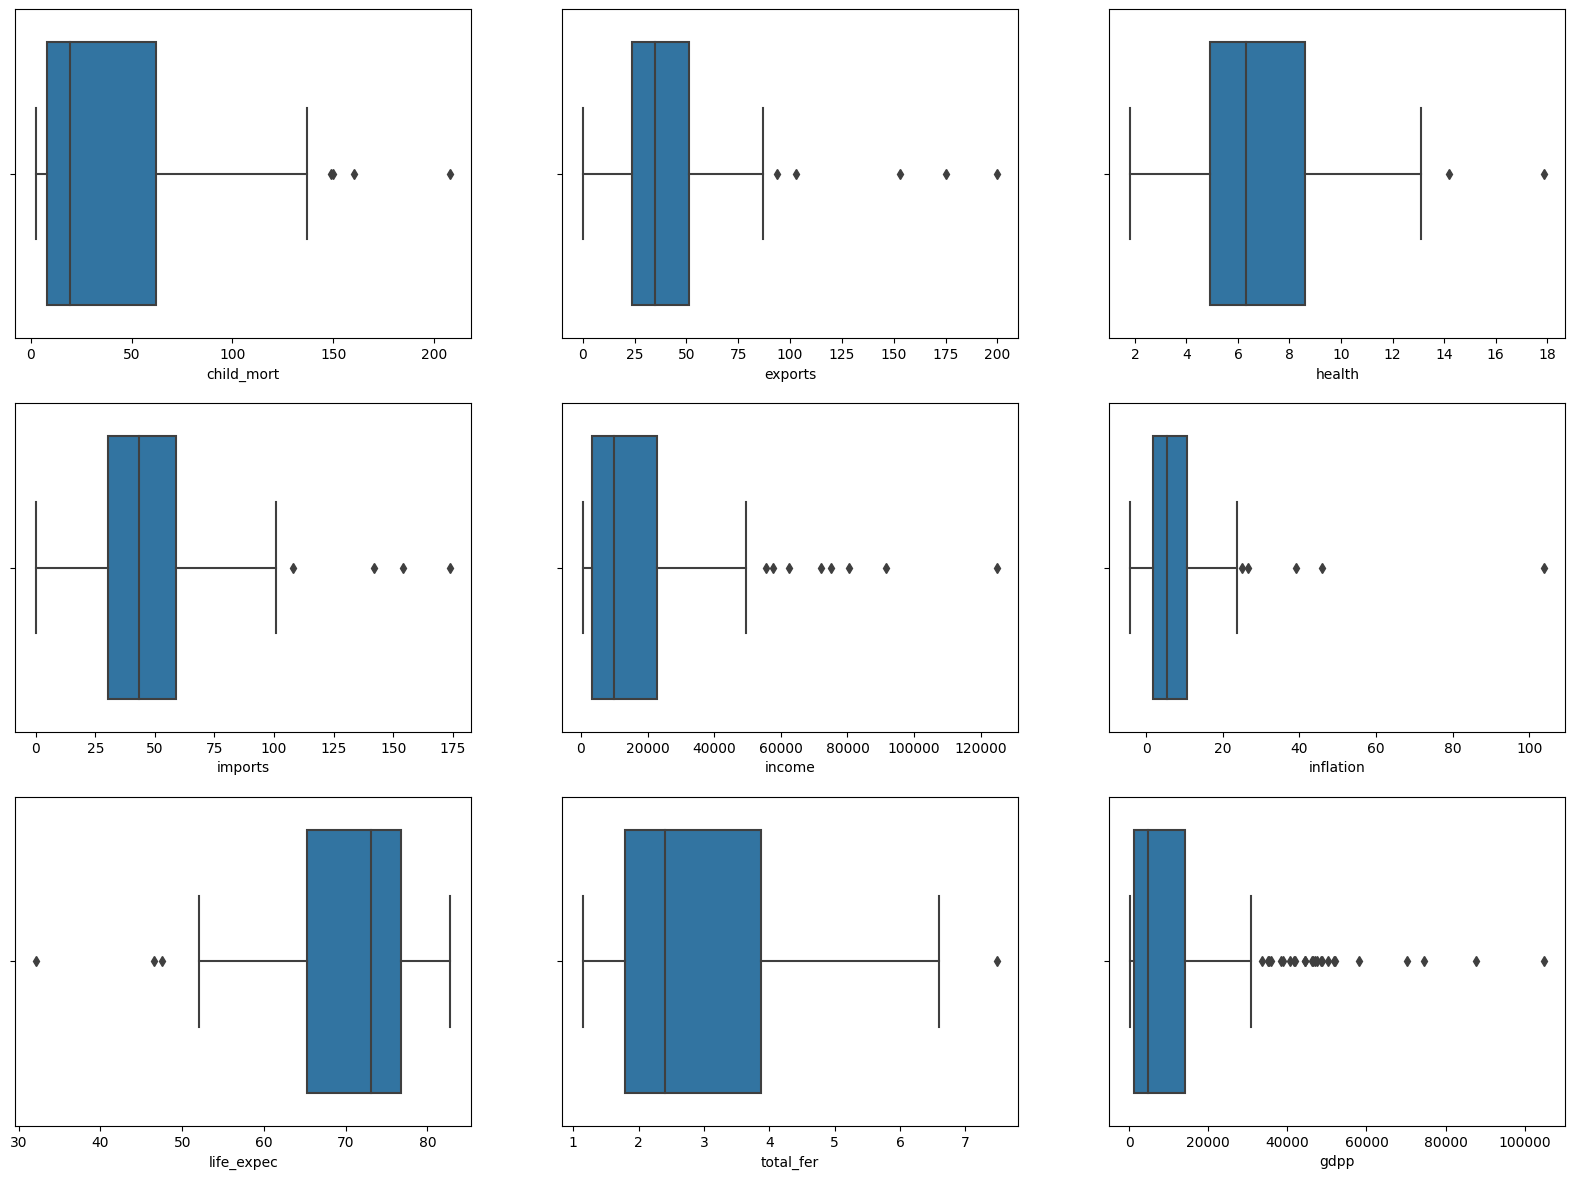

In [20]:
# checking for outliers using box-plots

plt.figure(figsize=(20,20), dpi=100)

plt.subplot(4,3,1)
sns.boxplot(x = 'child_mort', data = country_df)

plt.subplot(4,3,2)
sns.boxplot(x = 'exports', data = country_df)

plt.subplot(4,3,3)
sns.boxplot(x = 'health', data = country_df)

plt.subplot(4,3,4)
sns.boxplot(x = 'imports', data = country_df)

plt.subplot(4,3,5)
sns.boxplot(x = 'income', data = country_df)

plt.subplot(4,3,6)
sns.boxplot(x = 'inflation', data = country_df)

plt.subplot(4,3,7)
sns.boxplot(x = 'life_expec', data = country_df)

plt.subplot(4,3,8)
sns.boxplot(x = 'total_fer', data = country_df)

plt.subplot(4,3,9)
sns.boxplot(x = 'gdpp', data = country_df)

plt.show()

### Inference -

 - #### Outliers are present in all the variables but there are very few outliers (<= 5) for all variables except for income and gdpp .
 
 - #### We have limited number of countries (167) and Outlier treatment would change the ranking of few countries which might prevent few underdeveloped countries from getting financial aid.
 
 - #### But if we dont apply outlier treatment then it can impact the centroid of the cluster .However we can still validate different models with different K values.
 
 - #### Hence Lets proceed without any outlier treatment 

 - ### <u> Scaling the data

      We will use Standardisation method for scaling the data.

In [21]:
# instantiate
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Scale these variables using 'fit_transform'
country_df_scaled= scaler.fit_transform(country_df[varlist])
country_df_scaled.shape

(167, 9)

In [22]:
country_df_scaled = pd.DataFrame(country_df_scaled)
country_df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# 4. Model Building 

 - ### <u> Hopkins Statistics
    
The Hopkins statistic is a statistic which gives a value which indicates the cluster tendency .
It is used to check if the data is feasible for clustering or not .
Hopkins test examines whether data points differ significantly from uniformly distributed data in the multidimensional space.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [23]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [24]:
#Use the Hopkins Statistic function by passing the above scaled dataframe as a paramter
hopkins(country_df_scaled)

0.8923174575763689

### Inference -

 - #### Since the above value is between 0.7 -0.99 which indicates high tendency to cluster.

 - ### <u> HIERARCHICAL CLUSTERING
    


 SINGLE LINKAGE :
 
In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster.

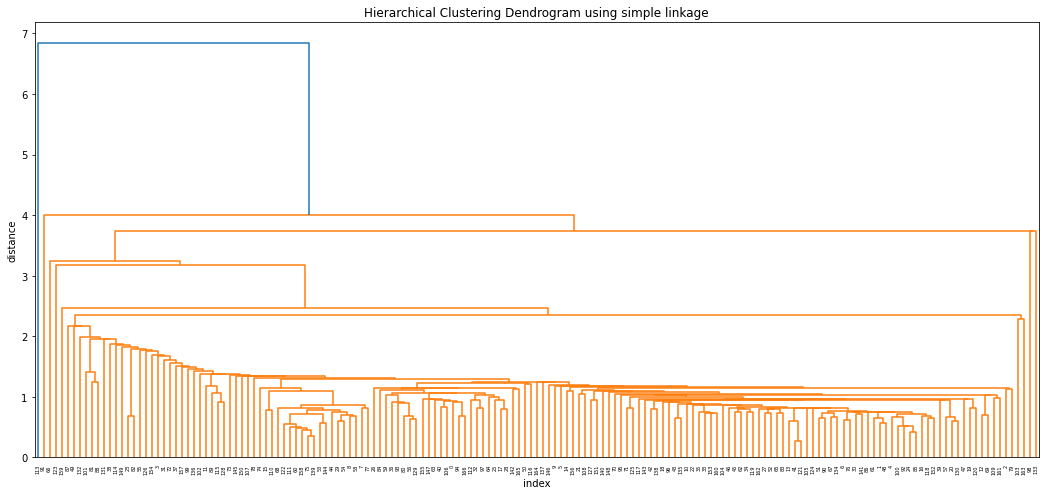

In [25]:
#single linkage
plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram using simple linkage')
plt.xlabel('index')
plt.ylabel('distance')
mergings_single = linkage(country_df_scaled, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

### Inference -

 - #### Since the single linkage dendrogram is not structured properly and do not have proper tree-like structure, we will try to create dendrogram using complete linkage.

COMPLETE LINKAGE :

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster

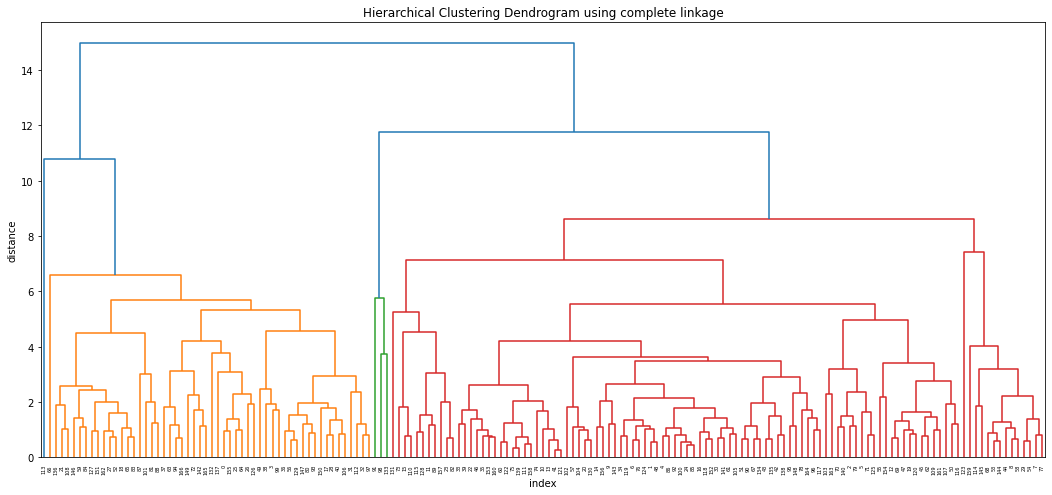

In [26]:
#complete linkage
plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram using complete linkage')
plt.xlabel('index')
plt.ylabel('distance')
mergings_complete = linkage(country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()


### Inference -

 - #### Since complete Linkage gives better clusters and the above dendrogram has a clear tree structure in order to identify the 'cut',So we will use Complete linkage .

In [27]:
#Using 3 clusters
cluster_labels_3 = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_labels_3

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [28]:
#create a copy of dataframe country_df
country_df_h = country_df.copy()

In [29]:
#add cluster labels to dataframe country_df_h
country_df_h['cluster_labels'] = cluster_labels_3
country_df_h.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [30]:
#checking distribution of clusters

country_df_h.cluster_labels.value_counts()

1    109
0     55
2      3
Name: cluster_labels, dtype: int64

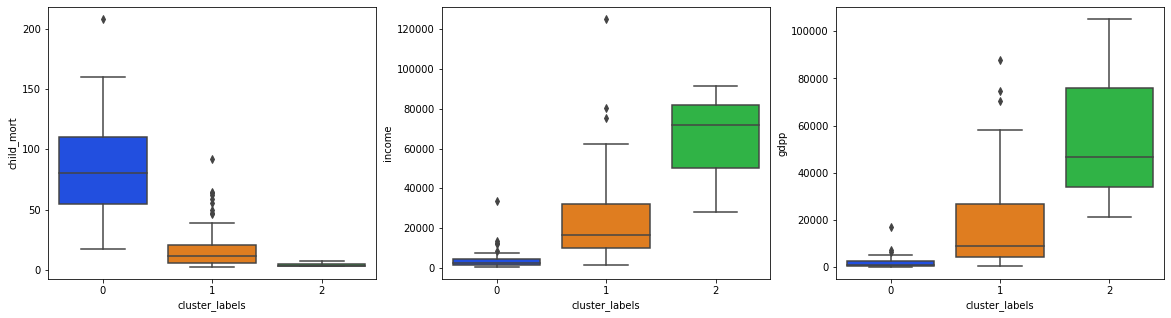

In [31]:
# Box plot to visualize different clusters

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels', y='child_mort', data=country_df_h, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels', y='income', data=country_df_h, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels', y='gdpp', data=country_df_h, palette="bright")


plt.show()

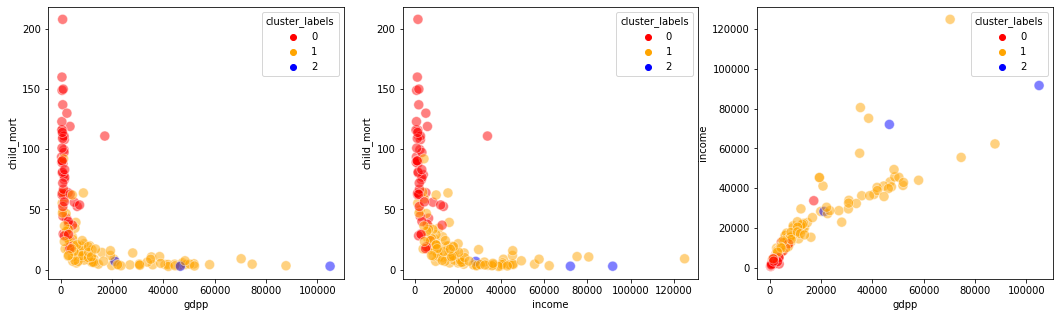

In [32]:
# Scatter plot to visualize different clusters

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels',
                data=country_df_h, legend='full',  palette=["red","orange","blue"], s=100, alpha=.5)

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels',
                data=country_df_h, legend='full', palette=["red","orange","blue"],s=100, alpha=.5)

plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels',
                data=country_df_h, legend='full',  palette=["red","orange","blue"], s=100, alpha=.5)

plt.show()

In [33]:
#check the countries in cluster 2

country_df_h[country_df_h['cluster_labels'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2


In [34]:
#check the countries in cluster 0

country_df_h[country_df_h['cluster_labels'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0
18,Bhutan,42.7,42.50,5.20,70.7,6420,5.990,72.1,2.38,2180,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0
27,Cambodia,44.4,54.10,5.68,59.5,2520,3.120,66.1,2.88,786,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0


In [35]:
#Using  4 clusters
cluster_labels_4 = cut_tree(mergings_complete, n_clusters=4).reshape(-1, )
cluster_labels_4

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [36]:
country_df_h['cluster_labels_new'] = cluster_labels_4
country_df_h.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,cluster_labels_new
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1


In [37]:
#checking distribution of clusters

country_df_h.cluster_labels_new.value_counts()

1    109
0     54
2      3
3      1
Name: cluster_labels_new, dtype: int64

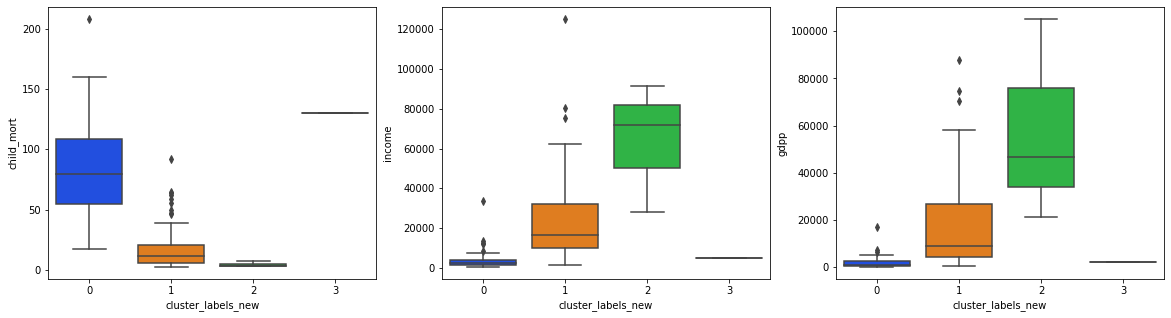

In [38]:
# Box plot to visualize different clusters

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_new', y='child_mort', data=country_df_h, palette="bright")

plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_new', y='income', data=country_df_h, palette="bright")

plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_new', y='gdpp', data=country_df_h, palette="bright")


plt.show()

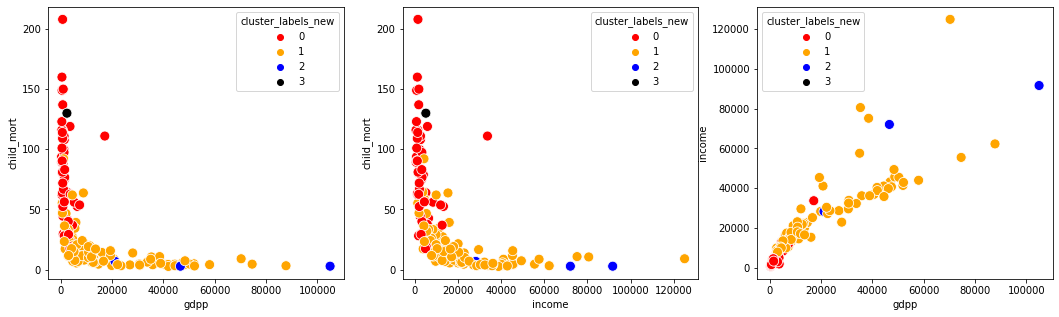

In [39]:
# Scatter plot to visualize different clusters

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_new',
                data=country_df_h, legend='full', palette=["red","orange","blue","black"], s=100)

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_new',
                data=country_df_h, legend='full', palette=["red","orange","blue","black"], s=100)

plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_new',
                data=country_df_h, legend='full', palette=["red","orange","blue","black"], s=100)

plt.show()

In [40]:
#check the countries in cluster 2

country_df_h[country_df_h['cluster_labels_new'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,cluster_labels_new
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2,2


In [41]:
#check the countries in cluster 3

country_df_h[country_df_h['cluster_labels_new'] == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,cluster_labels_new
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,0,3


### Inference - 

 - #### As seen from n_clusters=3 and n_clusters=4 , number of clusters should be 3 since when n_clusters=4 ,only Nigeria seems to be in single cluster.

 - #### As seen from EDA results , nigeria was among TOP 10 countries with high child mortality rate , high inflation,high fertility rate and lowest imports per capita.So it can be good candidate for financial aid.

 - #### Also n_clusters=3 gives better clusters Hence we will consider number of clusters = 3

 - ### <u> Analyse the clusters from HIERARCHICAL CLUSTERING

In [42]:
clusters_child_mort = pd.DataFrame(country_df_h.groupby(["cluster_labels"]).child_mort.mean())
clusters_income  = pd.DataFrame(country_df_h.groupby(["cluster_labels"]).income.mean())
clusters_gdpp  = pd.DataFrame(country_df_h.groupby(["cluster_labels"]).gdpp.mean())

In [43]:
df = pd.concat([pd.Series(list(range(0,3))), clusters_child_mort,clusters_income,clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "income_mean", "gdpp_mean"]
df

,ClusterID,child_mort_mean,income_mean,gdpp_mean
0,0,82.229091,3812.236364,1917.709091
1,1,17.028440,22581.559633,17310.458716
2,2,4.133333,64033.333333,57566.666667


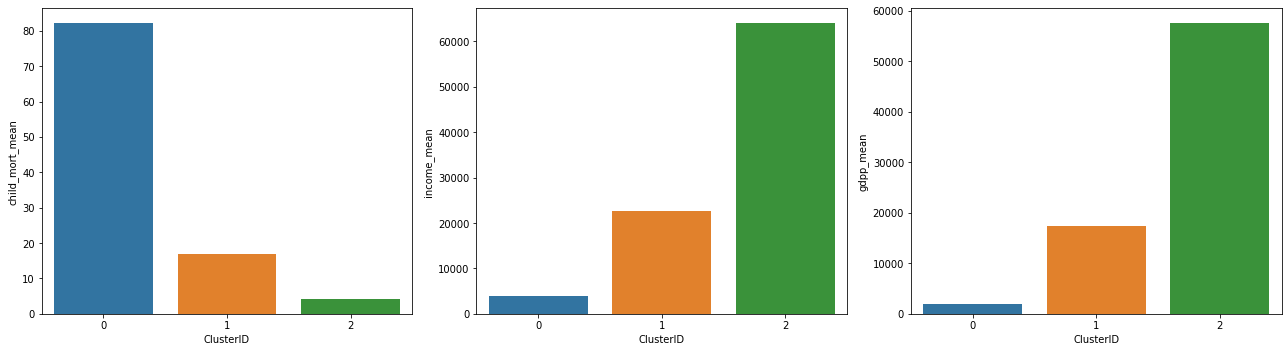

In [44]:
#Analyse all the 3 clusters using barplot
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)

plt.subplot(1, 3, 2)
sns.barplot(x=df.ClusterID, y=df.income_mean)

plt.subplot(1, 3, 3)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

plt.tight_layout()

### Inference - 

 - #### As seen from above plots , cluster 0 has highest child mortalility rate .

 - #### Also income and gdpp is least in cluster 0.Income and gdpp are measures of development. Higher the per capita income and gdpp better is the country's development.

 - #### Hence countries in cluster 0 are under-developed countries can be considered for financial aid.

 - #### Countries in cluster 1 are developing countries and countries in cluster 2 are developed countries with low child mortaliity rate followed by high income and gdp.

In [45]:
#list of countries under cluster 0 
country_df_h[country_df_h['cluster_labels'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,cluster_labels_new
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0,0
18,Bhutan,42.7,42.50,5.20,70.7,6420,5.990,72.1,2.38,2180,0,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,0,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0,0
27,Cambodia,44.4,54.10,5.68,59.5,2520,3.120,66.1,2.88,786,0,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0,0


 - ### <u> K-means CLUSTERING
    
  

#### finding the optimal number of clusters using elbow-curve/SSD

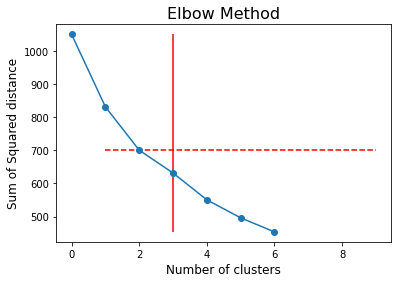

In [46]:

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each clusters
plt.plot(ssd, marker = 'o')
plt.title('Elbow Method', fontsize = 16)
plt.xlabel('Number of clusters',fontsize=12)
plt.ylabel('Sum of Squared distance',fontsize=12)
plt.vlines(x=3, ymax=ssd[-1], ymin=ssd[0], colors="r", linestyles="-")
plt.hlines(y=ssd[2], xmax=9, xmin=1, colors="r", linestyles="--")

#### finding the optimal number of clusters using Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [47]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.28735668921406704
For n_clusters=3, the silhouette score is 0.28329575683463126
For n_clusters=4, the silhouette score is 0.3021082505899252
For n_clusters=5, the silhouette score is 0.30440779730752227
For n_clusters=6, the silhouette score is 0.23307320684192728
For n_clusters=7, the silhouette score is 0.1973638942620701
For n_clusters=8, the silhouette score is 0.24786529510093616


### Inference - 

 - #### As seen from Elbow Curve & silhouette analysis,  3 or 4 clusters are optimal number of clusters to be used.
    
 - ####  We will try both k=3 and k=4 in K-Means clustering and analyse the results.


In [48]:
# K Means with with k=3
kmeans_3 = KMeans(n_clusters=3, max_iter=50)
kmeans_3.fit(country_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [49]:
kmeans_3.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

In [50]:
#create a copy of dataframe country_df
country_df_k = country_df.copy()

In [51]:
# assign the label
country_df_k['cluster_labels'] = kmeans_3.labels_
country_df_k.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [52]:
#checking distribution of clusters

country_df_k.cluster_labels.value_counts()

1    84
2    47
0    36
Name: cluster_labels, dtype: int64

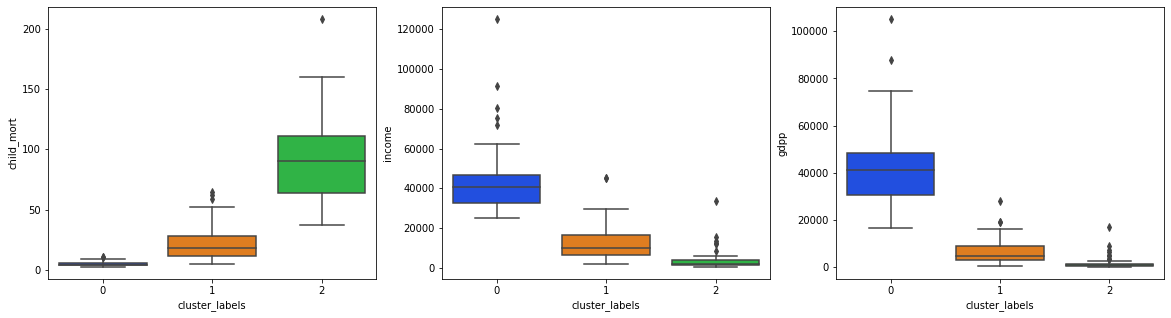

In [53]:
# Box plot to visualize different clusters

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels', y='child_mort', data=country_df_k, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels', y='income', data=country_df_k, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels', y='gdpp', data=country_df_k, palette="bright")


plt.show()

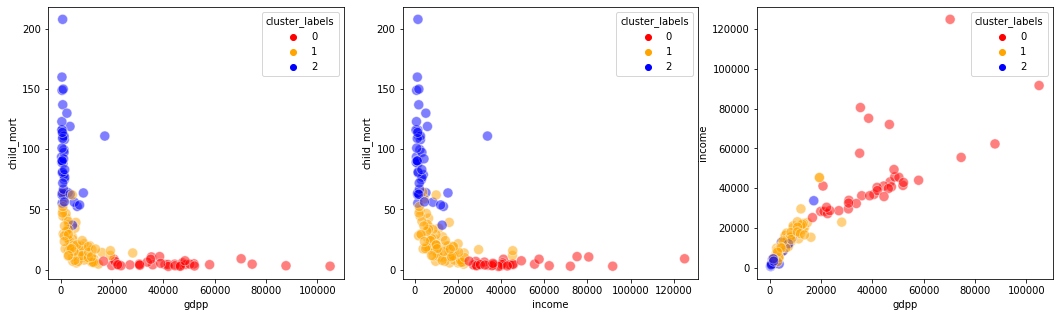

In [54]:
# Scatter plot to visualize different clusters

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels',
                data=country_df_k, legend='full', palette=["red","orange","blue"], s=100, alpha=.5)

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels',
                data=country_df_k, legend='full', palette=["red","orange","blue"], s=100, alpha=.5)

plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels',
                data=country_df_k, legend='full', palette=["red","orange","blue"], s=100, alpha=.5)

plt.show()

In [55]:
# K Means with with k=4
kmeans_4 = KMeans(n_clusters=4, max_iter=50)
kmeans_4.fit(country_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [56]:
kmeans_4.labels_

array([1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1,
       2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 3, 2,
       3, 2, 2, 2, 2, 1, 1, 2, 2, 3, 3, 1, 1, 2, 3, 1, 3, 2, 2, 1, 1, 2,
       1, 2, 3, 2, 2, 2, 1, 3, 3, 3, 2, 3, 2, 2, 1, 1, 3, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       3, 3, 1, 1, 3, 2, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 3, 2, 1, 3, 3, 2, 2, 1, 2, 3, 3, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [57]:
# assign the label
country_df_k['cluster_labels_new'] = kmeans_4.labels_
country_df_k.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,cluster_labels_new
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,2


In [58]:
#checking distribution of clusters

country_df_k.cluster_labels_new.value_counts()

2    87
1    47
3    30
0     3
Name: cluster_labels_new, dtype: int64

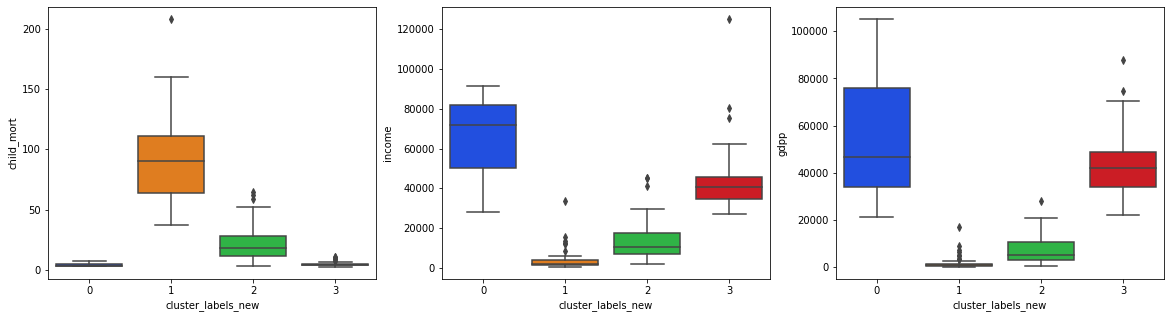

In [59]:
# Box plot to visualize different clusters

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_new', y='child_mort', data=country_df_k, palette="bright")

plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_new', y='income', data=country_df_k, palette="bright")

plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_new', y='gdpp', data=country_df_k, palette="bright")


plt.show()

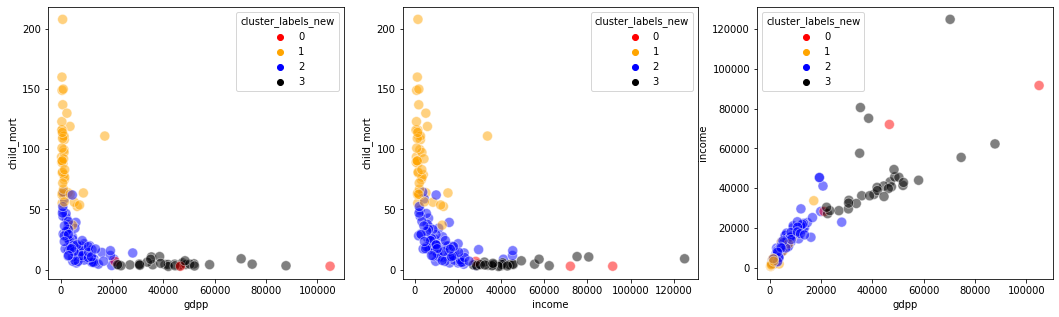

In [60]:
# Scatter plot to visualize different clusters

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_new',
                data=country_df_k, legend='full', palette=["red","orange","blue","black"], s=100,alpha=.5)

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_new',
                data=country_df_k, legend='full', palette=["red","orange","blue","black"], s=100,alpha=.5)

plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_new',
                data=country_df_k, legend='full', palette=["red","orange","blue","black"], s=100,alpha=.5)

plt.show()

### Inference - 

 - #### As seen from above , k=3 gives balanced clusters

 - #### Hence we will consider number of clusters = 3

 - ### <u> Analyse the clusters from K-MEANS CLUSTERING

In [61]:
Kclusters_child_mort = pd.DataFrame(country_df_k.groupby(["cluster_labels"]).child_mort.mean())
Kclusters_income  = pd.DataFrame(country_df_k.groupby(["cluster_labels"]).income.mean())
Kclusters_gdpp  = pd.DataFrame(country_df_k.groupby(["cluster_labels"]).gdpp.mean())

In [62]:
df_Kmeans = pd.concat([pd.Series(list(range(0,3))), Kclusters_child_mort,Kclusters_income,Kclusters_gdpp], axis=1)
df_Kmeans.columns = ["ClusterID", "child_mort_mean", "income_mean", "gdpp_mean"]
df_Kmeans

,ClusterID,child_mort_mean,income_mean,gdpp_mean
0,0,5.000000,45672.222222,42494.444444
1,1,21.927381,12305.595238,6486.452381
2,2,92.961702,3942.404255,1922.382979


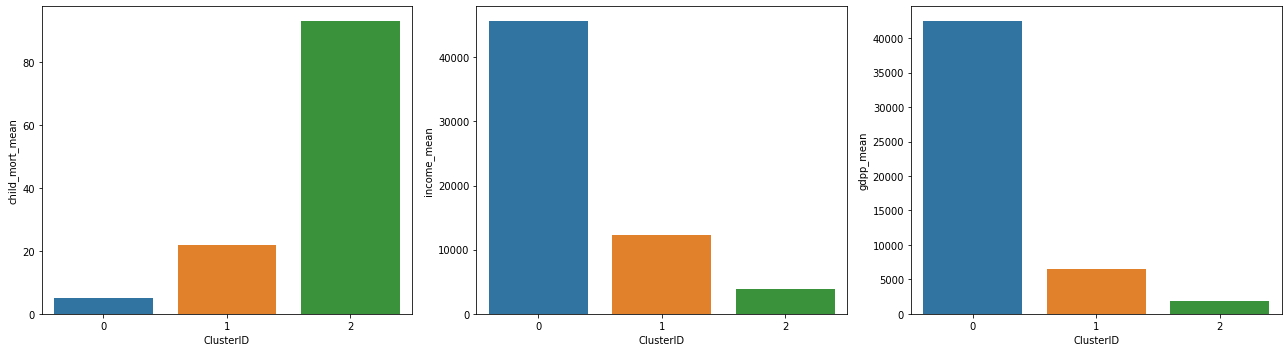

In [63]:
#Analyse all the 3 clusters using barplot
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=df_Kmeans.ClusterID, y=df_Kmeans.child_mort_mean)

plt.subplot(1, 3, 2)
sns.barplot(x=df_Kmeans.ClusterID, y=df_Kmeans.income_mean)

plt.subplot(1, 3, 3)
sns.barplot(x=df_Kmeans.ClusterID, y=df_Kmeans.gdpp_mean)

plt.tight_layout()

### Inference - 

 - #### As seen from above plots , cluster 2 has highest child mortalility rate .

 - #### Also income and gdpp is least in cluster 2.Income and gdpp are measures of development. Higher the per capita income and gdpp better is the country's development.

 - #### Hence countries in cluster 2 are under-developed countries that can be considered for financial aid.

 - #### Countries in cluster 1 are developing countries and countries in cluster 0 are developed countries with low child mortaliity rate followed by high income and gdp.

In [64]:
#list of countries under cluster 0
country_df_k[country_df_k['cluster_labels'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,cluster_labels_new
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,2,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2,1


# 5. Final Model 

In [65]:
Hierarchical_UnderDeveloped_countries = country_df_h[country_df_h['cluster_labels'] == 0]
Hierarchical_UnderDeveloped_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,cluster_labels_new
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0,0
18,Bhutan,42.7,42.50,5.20,70.7,6420,5.990,72.1,2.38,2180,0,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,0,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0,0
27,Cambodia,44.4,54.10,5.68,59.5,2520,3.120,66.1,2.88,786,0,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0,0


In [66]:
Hierarchical_UnderDeveloped_countries.shape

(55, 12)

In [67]:
KMeans_UnderDeveloped_countries = country_df_k[country_df_k['cluster_labels'] == 2]
KMeans_UnderDeveloped_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,cluster_labels_new
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,2,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2,1


In [68]:
KMeans_UnderDeveloped_countries.shape

(47, 12)

### Inference - 

- #### Hierarchical clustering approach identified 55 Under-developed countries.
 
- #### K-Means clustering approach identified 47 Under-developed countries.

- #### In Hierarchical clustering , around 65% of the data points are segmented into single cluster that is cluster 1 followed by 33% in cluster 0 and 2% in cluster 2.

- #### while in K-Means clustering , we got more balanced clusters compared to hierarchical clustering .Around 50% of the data points are segmented into single cluster that is cluster 1 followed by 28% in cluster 2 and 22% in cluster 0.
 
- #### So we will consider the 'K-Means with 3 Clusters' as our FINAL MODEL


In [69]:
UnderDeveloped_countries =KMeans_UnderDeveloped_countries 

In [70]:
UnderDeveloped_countries=UnderDeveloped_countries[['country', 'child_mort', 'income','gdpp']]
UnderDeveloped_countries

,country,child_mort,income,gdpp
0,Afghanistan,90.2,1610,553
3,Angola,119.0,5900,3530
17,Benin,111.0,1820,758
21,Botswana,52.5,13300,6350
25,Burkina Faso,116.0,1430,575
26,Burundi,93.6,764,231
28,Cameroon,108.0,2660,1310
31,Central African Republic,149.0,888,446
32,Chad,150.0,1930,897
36,Comoros,88.2,1410,769


In [71]:
UnderDeveloped_countries.describe()

,child_mort,income,gdpp
count,47.000000,47.000000,47.000000
mean,92.961702,3942.404255,1922.382979
std,33.375229,5641.790360,2956.103925
min,36.900000,609.000000,231.000000
25%,63.800000,1390.000000,550.000000
50%,90.200000,1870.000000,897.000000
75%,111.000000,3675.000000,1470.000000
max,208.000000,33700.000000,17100.000000


### Inference - 

 - #### As seen from above descriptive statistics , we will consider median values for child_mort ,income, gdpp to filter out countries with higher income,gdp and lower mortality rate.
 
 - #### Since our data is skewed (i.e.the frequency distribution for our data is skewed), we are choosing median over mean.

 - #### We will filter countries based on gdpp then income followed by child_mort .

In [72]:
UnderDeveloped_countries = UnderDeveloped_countries[UnderDeveloped_countries['gdpp'] <= 897]
UnderDeveloped_countries=UnderDeveloped_countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])
UnderDeveloped_countries

,country,child_mort,income,gdpp
26,Burundi,93.6,764,231
88,Liberia,89.3,700,327
37,"Congo, Dem. Rep.",116.0,609,334
112,Niger,123.0,814,348
132,Sierra Leone,160.0,1220,399
93,Madagascar,62.2,1390,413
106,Mozambique,101.0,918,419
31,Central African Republic,149.0,888,446
94,Malawi,90.5,1030,459
50,Eritrea,55.2,1420,482


In [73]:
UnderDeveloped_countries = UnderDeveloped_countries[UnderDeveloped_countries['income'] <= 1870]
UnderDeveloped_countries=UnderDeveloped_countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])
UnderDeveloped_countries

,country,child_mort,income,gdpp
26,Burundi,93.6,764,231
88,Liberia,89.3,700,327
37,"Congo, Dem. Rep.",116.0,609,334
112,Niger,123.0,814,348
132,Sierra Leone,160.0,1220,399
93,Madagascar,62.2,1390,413
106,Mozambique,101.0,918,419
31,Central African Republic,149.0,888,446
94,Malawi,90.5,1030,459
50,Eritrea,55.2,1420,482


In [74]:
UnderDeveloped_countries = UnderDeveloped_countries[UnderDeveloped_countries['child_mort'] >90.2]
UnderDeveloped_countries=UnderDeveloped_countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])
UnderDeveloped_countries

,country,child_mort,income,gdpp
26,Burundi,93.6,764,231
37,"Congo, Dem. Rep.",116.0,609,334
112,Niger,123.0,814,348
132,Sierra Leone,160.0,1220,399
106,Mozambique,101.0,918,419
31,Central African Republic,149.0,888,446
94,Malawi,90.5,1030,459
150,Togo,90.3,1210,488
64,Guinea-Bissau,114.0,1390,547
25,Burkina Faso,116.0,1430,575


In [75]:
# top 12 underdeveloped countries

top_12=UnderDeveloped_countries.head(12)
top_12

,country,child_mort,income,gdpp
26,Burundi,93.6,764,231
37,"Congo, Dem. Rep.",116.0,609,334
112,Niger,123.0,814,348
132,Sierra Leone,160.0,1220,399
106,Mozambique,101.0,918,419
31,Central African Republic,149.0,888,446
94,Malawi,90.5,1030,459
150,Togo,90.3,1210,488
64,Guinea-Bissau,114.0,1390,547
25,Burkina Faso,116.0,1430,575


### Based on our Clustering Analysis, we have identified below top 12 countries who are in dire need of the Financial Aid -

In [76]:
top_12

,country,child_mort,income,gdpp
26,Burundi,93.6,764,231
37,"Congo, Dem. Rep.",116.0,609,334
112,Niger,123.0,814,348
132,Sierra Leone,160.0,1220,399
106,Mozambique,101.0,918,419
31,Central African Republic,149.0,888,446
94,Malawi,90.5,1030,459
150,Togo,90.3,1210,488
64,Guinea-Bissau,114.0,1390,547
25,Burkina Faso,116.0,1430,575


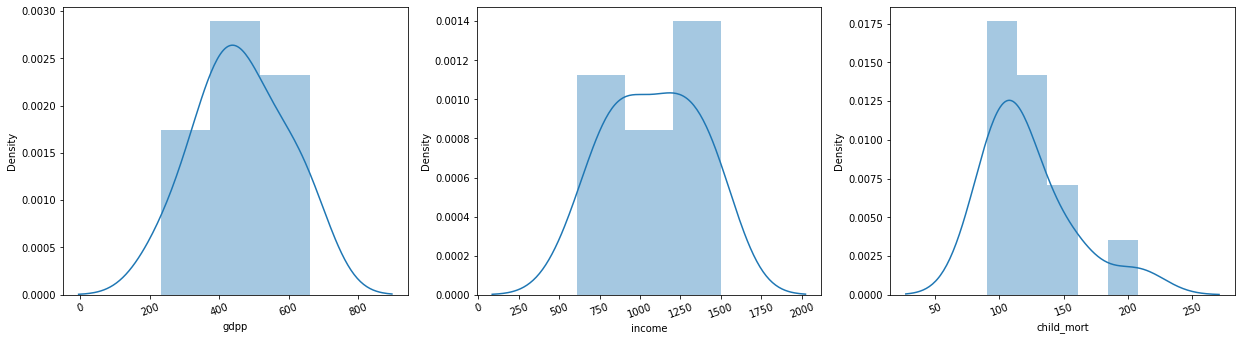

In [77]:
#Univariate Analysis of top 12 underdeveloped countries
plt.figure(figsize=(21, 18))
variables = ['gdpp','income','child_mort']
for i in enumerate(variables):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(top_12[i[1]])
    plt.xticks(rotation=20)

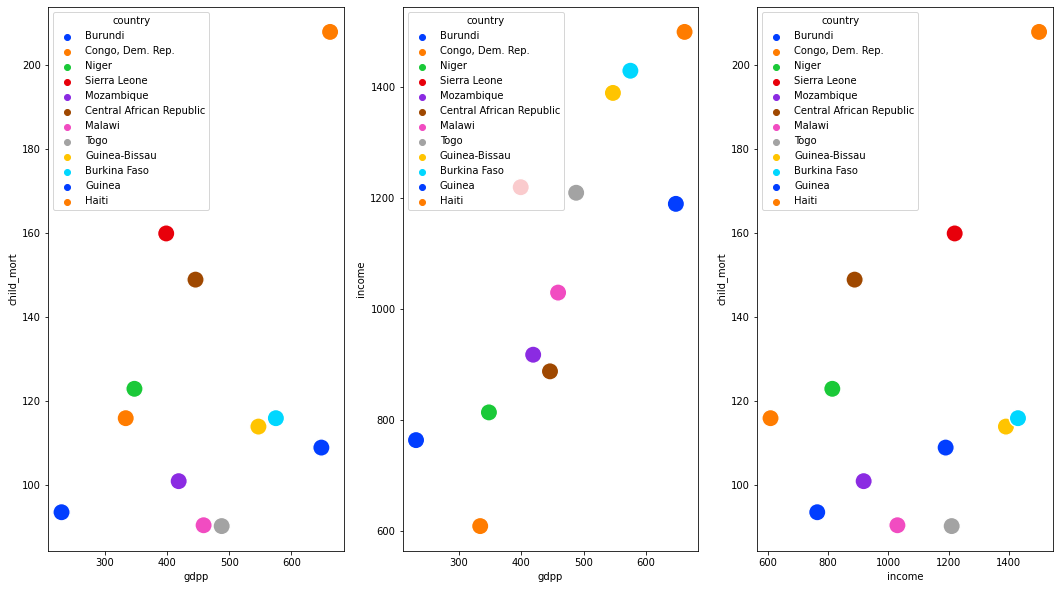

In [78]:
#Bivariate Analysis of top 12 underdeveloped countries
plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='country',
                data=top_12, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 2)
sns.scatterplot(x='gdpp', y='income', hue='country',
                data=top_12, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 3)
sns.scatterplot(x='income', y='child_mort', hue='country',
                data=top_12, legend='full', palette="bright", s=300, c='lightblue')
plt.show()


## Recommendations - 

#### 1.CEO must definately focus on below 4 countries as they fall under top 10 countries with low income,gdpp and high child mortality rate-
 - #### Sierra Leone
 - #### Central African Republic
 - #### Congo Dem. Rep
 - #### Niger

#### 2.Higher fertility rate leads to higher child mortality rate and lower life_expectency.
#### Hence NGO should make use of this financial aid and organize family planning awareness program in countries with higher fertility rate.They should educate them about impact of fertility rate on country's development .low fertility increases the number of people of working age per capita and hence beneficial to the economy

#### 3.Since this is a financial aid , so CEO must give priority to gdpp followed by income and then child mortality rate.They should focus more on countries with low income and low gdp .As countries with high mortality rate but higher income and higher gdp would not benefit much from financial aid compared to countries with low income and low gdp.
#### This Financial aid can be used by under developed countries to improve healthcare facilities,hygiene and sanitation and adequate food.


#### 4. NGO should focus on improving gdp and income of under-developed countries .GDP per capita increases the life expectancy at birth through increasing economic growth and development in a country and thus leads to the prolongation of longevity and decrease in child mortality .
